# Bag of Words model for Rating Prediction from Text Review

In [1]:
import pandas as pd
import numpy as np
import time

import numpy as np
import re
import nltk
from sklearn.datasets import load_files
import matplotlib.pyplot as plt
import seaborn as sn
import pickle
from nltk.corpus import stopwords

## Loading data from csv file

In [2]:
seedly_df = pd.read_csv('seedly.csv')

In [3]:
seedly_df['text'] = seedly_df['text'].str.lower()
seedly_df.head()

,ratings,text
0,4,"no frills telco, but do give existing customer..."
1,5,application process the application process w...
2,4,impressive branding at the start. app has a gr...
3,4,"i haven’t started yet, and i really would have..."
4,5,2 years on circles.life and their customer sup...


In [4]:
X = seedly_df['text'].tolist()
y = seedly_df['ratings'].tolist()

from collections import Counter
print("The class distribution is: ", Counter(y))

The class distribution is:  Counter({5: 3448, 4: 1217, 3: 364, 1: 319, 2: 130})


## Text preprocessing

In [5]:
documents = []

from nltk.stem import WordNetLemmatizer
stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    # Converting to Lowercase
    document = document.lower()
    # Lemmatization
    document = document.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)

    documents.append(document)

## Importing all sklearn necessities

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## TF-IDF Vectorizer

In [35]:
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()
X.shape

(5478, 1500)

## Function definition to split data, fit classifier and show results

In [38]:
def run_sklearn_classifier(classifier, X, y, test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    print("\n[R] Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
    print("\n[R] Classification Report:\n", classification_report(y_test,y_pred))

    print("\n[R] The accuracy score is: ", accuracy_score(y_test, y_pred))

    df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred), index = [i for i in "12345"],
                      columns = [i for i in "12345"])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True, cmap='gist_earth_r')

## Results for RandomForestClassifier


[R] Confusion Matrix:
 [[ 14   0   0   4  41]
 [  5   0   0   5  12]
 [  0   0   2  18  61]
 [  1   0   0  45 200]
 [  1   0   1  20 666]]

[R] Classification Report:
               precision    recall  f1-score   support

           1       0.67      0.24      0.35        59
           2       0.00      0.00      0.00        22
           3       0.67      0.02      0.05        81
           4       0.49      0.18      0.27       246
           5       0.68      0.97      0.80       688

   micro avg       0.66      0.66      0.66      1096
   macro avg       0.50      0.28      0.29      1096
weighted avg       0.62      0.66      0.58      1096


[R] The accuracy score is:  0.6633211678832117


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


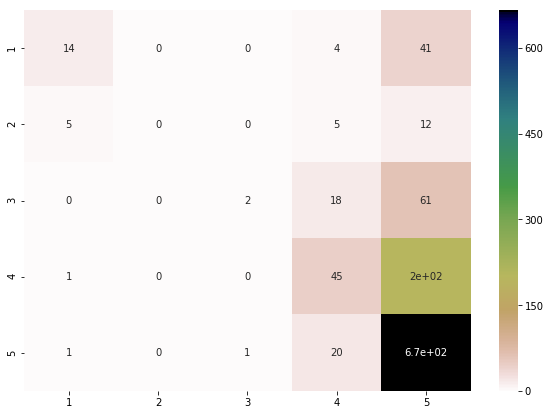

In [39]:
clf_RF = RandomForestClassifier(n_estimators=1000, random_state=0)
run_sklearn_classifier(clf_RF, X, y)

## Results for LogisticRegressionClassifier


[R] Confusion Matrix:
 [[ 15   0   0   8  36]
 [  4   0   0   5  13]
 [  1   0   1  23  56]
 [  2   0   2  53 189]
 [  1   0   0  42 645]]

[R] Classification Report:
               precision    recall  f1-score   support

           1       0.65      0.25      0.37        59
           2       0.00      0.00      0.00        22
           3       0.33      0.01      0.02        81
           4       0.40      0.22      0.28       246
           5       0.69      0.94      0.79       688

   micro avg       0.65      0.65      0.65      1096
   macro avg       0.42      0.28      0.29      1096
weighted avg       0.58      0.65      0.58      1096


[R] The accuracy score is:  0.6514598540145985


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


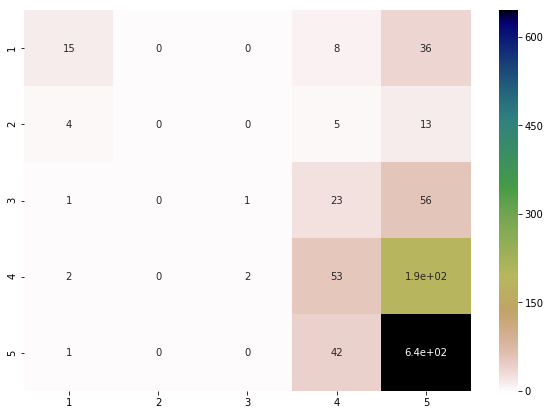

In [40]:
clf_LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
run_sklearn_classifier(clf_LR, X, y)

## Results for LinearSVM Classifier


[R] Confusion Matrix:
 [[ 26   2   2  11  18]
 [  6   0   3   6   7]
 [  3   1   6  33  38]
 [  4   0  14  80 148]
 [  7   0   8  90 583]]

[R] Classification Report:
               precision    recall  f1-score   support

           1       0.57      0.44      0.50        59
           2       0.00      0.00      0.00        22
           3       0.18      0.07      0.11        81
           4       0.36      0.33      0.34       246
           5       0.73      0.85      0.79       688

   micro avg       0.63      0.63      0.63      1096
   macro avg       0.37      0.34      0.35      1096
weighted avg       0.59      0.63      0.61      1096


[R] The accuracy score is:  0.6341240875912408


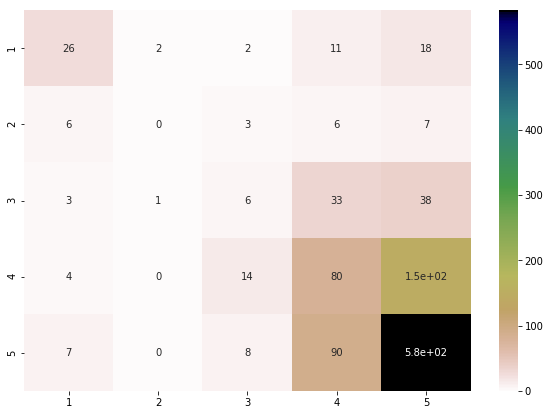

In [42]:
clf_SVM = LinearSVC(random_state=0, tol=1e-5)
run_sklearn_classifier(clf_SVM, X, y)